In [1]:
#Importing basic modules
import numpy as np
import pandas as pd
import datetime as dt

#Importing needed matplotlib and styling modules to plot data
%matplotlib inline
from matplotlib import style
style.use('seaborn-v0_8-pastel')
import matplotlib.pyplot as plt

# Importing sqlalchemy modules to bring sql database files into jupyter notebook
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:
# Connect to sqlite database file with information on climate in Hawaii
engine = create_engine("sqlite:///hawaii.sqlite")

# Use automap to automatically create classes from database so we don't have to do it manually
Base = automap_base()
Base.prepare(autoload_with=engine)

# Verify that all the classes for our database were created
Base.classes.keys()

['station', 'measurement']

In [4]:
# Save the mapped table classes into defined objects
Measurement = Base.classes.measurement
Station = Base.classes.station

# Use inspect module from sqlalchemy to get table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [5]:
# Use inspect module from sqlalchemy get a list of column names and types for 'measurement' table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [6]:
# Use inspect module from sqlalchemy get a list of column names and types for 'station' table
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [7]:
# Create session so that we can start querying our database
session = Session(engine)

# To find most recent data, arrange date column in descending order and print first row
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

Text(0, 0.5, 'Inches')

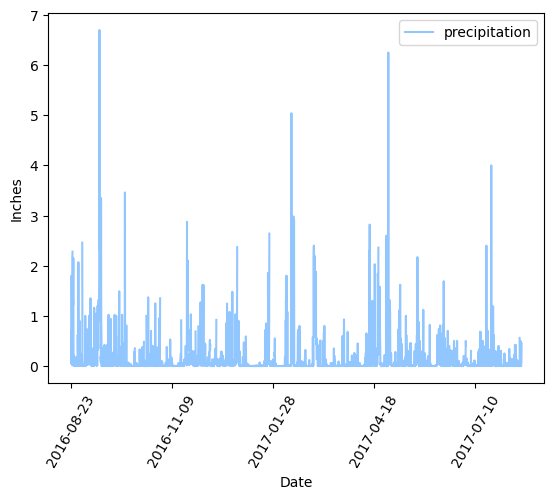

In [8]:
# Calculate the date a year(365 days) before the final date in the data set
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Query database to find the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Export to dataframe and name columns
df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort values by date
df = df.sort_values("date")

# Create histogram with matplotlib
df.plot(x='date', y='precipitation', rot=60)
plt.xlabel("Date")
plt.ylabel("Inches")

In [9]:
# Create summary of statistics for precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [10]:
# Count number of stations in 'station' class
session.query(func.count(Station.station)).all()

[(9,)]

In [11]:
# Sort stations by activity level
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [12]:
# Calculate minimum, maximum, and average temperatures based on most active station.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 23.52222222222222, 'Temperature')

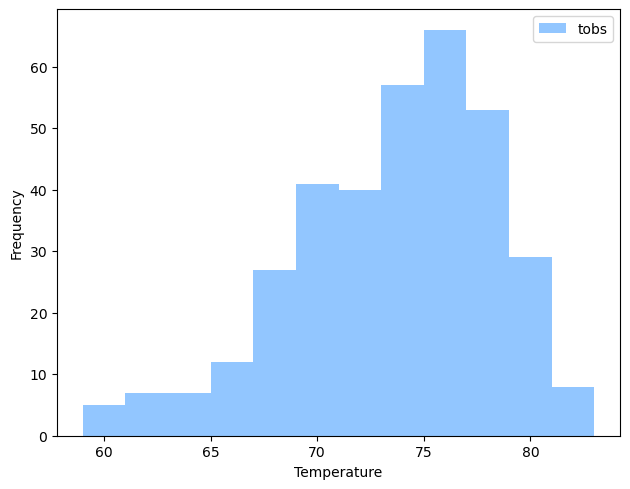

In [13]:
# Calculate the date a year(365 days) before the final date in the data set
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Query data
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()
# Export queried data to dataframe and name column
df = pd.DataFrame(results, columns=['tobs'])
#Create histogram for last 12 months before most recent data of temperature for the most active station
df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")

In [14]:
# Closing query session
session.close()